In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
import tensorflow as tf

In [122]:
holidaysdf = pd.read_csv('/content/drive/MyDrive/store-sales/holidays_events.csv')
oildf = pd.read_csv('/content/drive/MyDrive/store-sales/oil.csv')
storedf = pd.read_csv('/content/drive/MyDrive/store-sales/stores.csv')
traindf = pd.read_csv('/content/drive/MyDrive/store-sales/train.csv')
testdf = pd.read_csv('/content/drive/MyDrive/store-sales/test.csv')
transactionsdf = pd.read_csv('/content/drive/MyDrive/store-sales/transactions.csv')


In [123]:
holidaysdf.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [124]:
oildf.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [125]:
storedf.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [126]:
traindf.head(-10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
3000873,3000873,2017-08-15,9,HOME CARE,373.0,6
3000874,3000874,2017-08-15,9,LADIESWEAR,10.0,0
3000875,3000875,2017-08-15,9,LAWN AND GARDEN,11.0,3
3000876,3000876,2017-08-15,9,LINGERIE,6.0,0


In [127]:
testdf.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [128]:
transactionsdf.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [129]:
def converttonumber(col, df):
    colvalues = df[col].value_counts()
    colvaluelist = colvalues.index
    colvaluesseries = pd.Series(colvaluelist)
    print(colvaluesseries)
    
    for ivalue in range(0,len(colvaluesseries)):
        df[col].replace(colvaluesseries[ivalue], colvaluesseries[colvaluesseries == colvaluesseries[ivalue]].index[0], inplace=True)
    return df
    

<Axes: xlabel='store_nbr'>

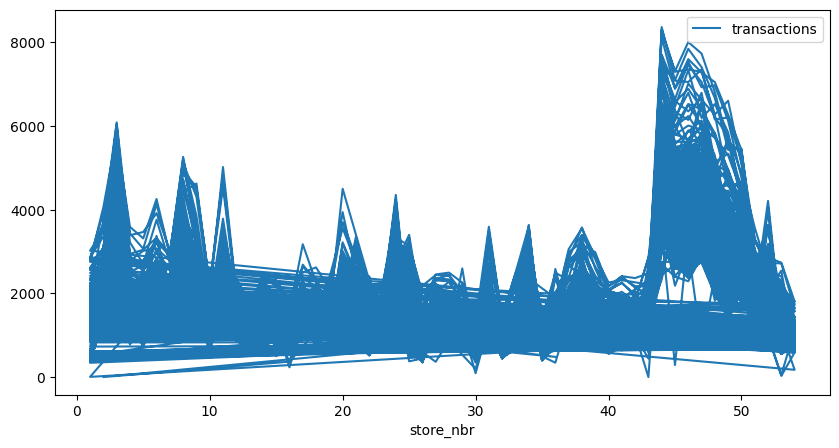

In [130]:

transactionsdf.plot(figsize=(10,5),x='store_nbr',y='transactions')

In [131]:
oildf.rename(columns={'dcoilwtico':'oil_price'},inplace=True)

In [ ]:
mastertraindf = pd.merge(traindf, holidaysdf, on='date', how='left')
mastertraindf = pd.merge(mastertraindf, oildf, on='date', how='left')
mastertraindf = pd.merge(mastertraindf, storedf, on='store_nbr', how='left')
mastertraindf = pd.merge(mastertraindf, transactionsdf, on=['store_nbr', 'date'], how='left')
mastertraindf.rename(columns={'type_x':'holidaytype', 'type_y':'storetype'}, inplace=True)
mastertraindf['holidaytype'].fillna('No', inplace=True)
mastertraindf['test'] = 0
mastertraindf.head()


In [ ]:
mastertestdf = pd.merge(testdf, holidaysdf, on='date', how='left')
mastertestdf = pd.merge(mastertestdf, oildf, on='date', how='left')
mastertestdf = pd.merge(mastertestdf, storedf, on='store_nbr', how='left')
mastertestdf = pd.merge(mastertestdf, transactionsdf, on=['store_nbr', 'date'], how='left')

In [ ]:


oildf['oil_price'].fillna(method='bfill', inplace=True)
oildf['date']=pd.to_datetime(oildf['date'])
oildf['dayofweek']=oildf['date'].dt.weekday
oildf.head()


In [ ]:
oildf.plot(figsize=(10,5),title='oil_prices',x='date',y='oil_price',xlabel='year')

In [ ]:
dayofweek=oildf['dayofweek'].unique()

week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dayofweek.sort()


In [ ]:
for i in dayofweek:
  oildf.loc[oildf['dayofweek']==i].plot(y='oil_price',x='date',figsize=(10,5))
  plt.title(week[i],fontsize=15)
  plt.xlabel('date')
  plt.ylabel('oil prices')

In [ ]:
oildf.drop(['dayofweek'],inplace=True,axis=1)
oildf.head()

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(mastertraindf.corr(), fignum=f.number)
plt.xticks(range(mastertraindf.select_dtypes(['number']).shape[1]), mastertraindf.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(mastertraindf.select_dtypes(['number']).shape[1]), mastertraindf.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [ ]:
mastertraindf.drop(['id','locale', 'description', 'transferred', 'locale_name','cluster','city','state','storetype','test'], inplace=True, axis=1)
mastertraindf.head(-5)


In [ ]:
Rep = mastertraindf.pivot_table(index = ['store_nbr'], aggfunc ='size', sort = 'True')
print(len(Rep))
print(sorted(Rep,reverse=True))

In [ ]:
#mastertraindf.rename(columns={'dcoilwtico':'oil_price'},inplace=True)
mastertraindf['oil_price'].fillna(method='bfill', inplace=True)
#mastertraindf['oil_price'].fillna(mastertraindf['oil_price'].mean(), inplace=True)


mastertraindf['holidaytype'].fillna('No', inplace=True)
mastertraindf['transactions'].fillna(0, inplace=True)

mastertraindf.head()

In [ ]:
Rep = mastertraindf.pivot_table(index = ['family'], aggfunc ='size')
print(Rep)

family_dict = {}
j = 0
for i in Rep.index:
  if(i not in family_dict):
    family_dict[i]=j
    j+=1

family_dict

In [ ]:
Rep = mastertraindf.pivot_table(index = ['holidaytype'], aggfunc ='size', sort = 'True')
print(Rep)
print(Rep.sort_values(ascending = False))

Holiday_dict = {}
j = 0
for i in Rep.sort_values(ascending = False).index:
  if(i not in Holiday_dict):
    Holiday_dict[i]=j
    j+=1
    
Holiday_dict


In [ ]:
mastertraindf = converttonumber('holidaytype', mastertraindf)
mastertraindf = converttonumber('family', mastertraindf)
#mastertraindf = converttonumber('storetype', mastertraindf)

In [ ]:
mastertraindf.plot(figsize=(10,5),title='date-sales',x='date',y='sales',xlabel='year')

In [ ]:
#mastertraindf['date'] = mastertraindf['date'].str.replace('-','')

In [ ]:
mastertraindf.head(-10)

In [ ]:
train1=pd.DataFrame(mastertraindf['date'],columns=['date'])

In [ ]:
mastertraindf['date']=pd.to_datetime(mastertraindf['date'])
mastertraindf['dayofweek']=mastertraindf['date'].dt.weekday

In [ ]:

mastertestdf.rename(columns={'type_x':'holidaytype', 'type_y':'storetype'}, inplace=True)
mastertestdf.drop(['id', 'locale','locale_name','description', 'storetype','city', 'state', 'cluster'], inplace=True, axis=1)
mastertestdf['test'] = 1

## Feature setup
#mastertestdf.rename(columns={'dcoilwtico':'oil_price'},inplace=True)
mastertestdf['oil_price'].fillna(method='bfill', inplace=True)
#mastertestdf['oil_price'].fillna(mastertestdf['oil_price'].mean(), inplace=True)
mastertestdf['holidaytype'].fillna('No', inplace=True)
mastertestdf['transactions'].fillna(0, inplace=True)

#mastertestdf['date'] = mastertestdf['date'].str.replace('-','')
mastertestdf.head()

In [ ]:
mastertestdf = converttonumber('holidaytype', mastertestdf)
mastertestdf = converttonumber('family', mastertestdf)
#mastertestdf = converttonumber('storetype', mastertraindf)

In [ ]:
#mastertraindf.drop(['storetype'], inplace=True)
#mastertestdf.drop(['storetype'], inplace=True, axis=1)
mastertestdf.head()

In [ ]:
test1=pd.DataFrame(mastertestdf['date'],columns=['date'])

In [ ]:
mastertestdf['date']=pd.to_datetime(mastertestdf['date'])
mastertestdf['dayofweek']=mastertestdf['date'].dt.weekday

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_log_error

X = mastertraindf[['dayofweek', 'store_nbr', 'family', 'onpromotion', 'holidaytype', 'oil_price', 'transactions']]
y = mastertraindf['sales']
X_predict = mastertestdf[['dayofweek', 'store_nbr', 'family', 'onpromotion', 'holidaytype', 'oil_price', 'transactions']]
# There are no sales values available for X_predict data, its given to test out our model if it predicts accurate results

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
def root_mean_squared_log_error(real, predicted):
    
    sum=0.0
    for x in range(len(predicted)):
        
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()


In [ ]:
linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)

In [ ]:
print('LINEAR MODEL')
print('MAE',   mean_absolute_error(y_pred,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))
print('RMSLE',root_mean_squared_log_error(np.array(y_test),y_pred)  )      

In [ ]:
linearaccuracy=int(round(r2_score(np.array(y_test),y_pred),2)*100)

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(X_test.iloc[:,0], y_test, color ='red',linestyle='none')
# plt.plot(X_test.iloc[:,0], y_pred, color ='b',linestyle='none')
  
# plt.show()

In [ ]:
y_pred.shape


In [ ]:
# linear.score(predicted,y_test)

In [ ]:
#linear_error=mean_squared_log_error(predicted, y_test)

In [ ]:
from sklearn.linear_model import Lasso 
lasso=Lasso(alpha=0.00001)
lasso.fit(X_train,y_train)

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
print('LASSO MODEL')
print('MAE',   mean_absolute_error(y_pred,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))
print('RMSLE',root_mean_squared_log_error(np.array(y_test),y_pred)  )      

In [ ]:
# lasso.score(y_pred,y_test)

In [ ]:
lassoaccuracy=int(round(r2_score(np.array(y_test),y_pred),2)*100)
lassoaccuracy

In [ ]:
pred_lasso=lasso.predict(X_test) 
error=mean_squared_error(y_test,pred_lasso)
error

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)

In [ ]:
ridge.score(X_test,y_test)

In [ ]:
y_pred=ridge.predict(X_test)
error=mean_squared_error(y_pred,y_test)
error

In [ ]:
print('RIDGE MODEL')
print('MAE',   mean_absolute_error(y_pred,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))
print('RMSLE',root_mean_squared_log_error(np.array(y_test),y_pred)  )      

In [ ]:
ridgeaccuracy=int(round(r2_score(np.array(y_test),y_pred),2)*100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10)
RFR.fit(X_train,y_train)


In [ ]:
RFR.score(X_test,y_test)

In [ ]:
y_pred=RFR.predict(X_test)

In [ ]:
print('RANDOM FOREST MODEL')
print('MAE',   mean_absolute_error(y_pred,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))
print('RMSLE',root_mean_squared_log_error(np.array(y_test),y_pred)  )      

In [ ]:
rfaccuracy=int(round(r2_score(np.array(y_test),y_pred),2)*100)
rfaccuracy

In [ ]:
y_test.head()

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=10, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print('XGBOOST MODEL')
print('MAE',   mean_absolute_error(y_pred,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))
print('RMSLE',root_mean_squared_log_error(np.array(y_test),y_pred)  )      

In [ ]:
xgboostaccuracy=int(round(r2_score(np.array(y_test),y_pred),2)*100)
xgboostaccuracy

In [ ]:
graph_x=['linear','lasso','ridge','random forest','xgboost']
graph_y=[linearaccuracy,lassoaccuracy,ridgeaccuracy,rfaccuracy,xgboostaccuracy]
plt.bar(graph_x,graph_y)
plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_pred, y_test, squared=False)

regression_error=mean_squared_error(y_pred, y_test)
regression_error

In [ ]:
X_predict.head()

In [ ]:
X_predict.shape

In [ ]:
y_pred = pd.DataFrame({'sales':RFR.predict(X_predict)})
y_pred.head()

In [ ]:
y_pred.shape 


In [ ]:
import joblib 
joblib.dump(RFR,'model.h5')

In [ ]:
mastertraindf.head()

In [ ]:
actualdata=mastertraindf.groupby('date')['sales'].sum()
actualdata.head(-10)

In [ ]:
actualdata.plot(figsize=(10,5),title='date-sales',x='date',y='sales',xlabel='year')

In [ ]:
y_pred=pd.concat([y_pred,test1],axis=1)
y_pred.head()

In [ ]:
y_pred.shape

In [ ]:
y_pred.head()

In [ ]:
# y_pred.to_csv('test2.csv')

In [ ]:
y_pred.head()

In [ ]:
forecasted_data=y_pred.groupby('date')['sales'].sum()
forecasted_data.head()

In [ ]:
forecasted_data.shape

In [ ]:
forecasted_data.plot(figsize=(10,5),title='date-sales',x='date',y='sales',xlabel='year')

In [ ]:
mastertraindf.head()

In [ ]:
df=mastertraindf
df1=mastertestdf

In [ ]:
# # store1train=df[df['store_nbr']==10]

# # store1train=store1train[(store1train['family']==1)]
# store1train=df[(df['date']>='2016-01-01') & (df['date']<='2017-08-15')]

# store1train.head()

In [ ]:
# store1train.plot.bar(x='date',y='sales')

In [ ]:
# store1train.to_csv('train12.csv')
X = mastertraindf[['dayofweek', 'store_nbr', 'family', 'onpromotion', 'holidaytype', 'oil_price', 'transactions']]


In [ ]:
import calendar 
date='2023-03-20'
year,month,day=(int(i) for i in date.split('-'))
dayofweek=calendar.weekday(year,month,day)+1
familydict={
    'AUTOMOTIVE':0,
    "BEAUTY":2,
    'BOOKS':4,
    'HARDWARE':14,
    'MAGAZINES':23,
    'PET SUPPLIES':26,
    'ELECTRONICS':27
}

if dayofweek>5:
  holiday=1 
else:
  holiday=5 
store_nbr=17 
promotion=17 
oil_price=540
transactions=54
RFR.predict([[dayofweek,store_nbr,familydict['AUTOMOTIVE'],promotion,holiday,oil_price,transactions]])